### MNIST PROJECT

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)






In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

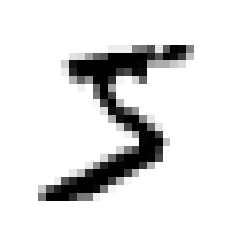

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [10]:
#That's an five
y[0]

'5'

In [11]:
import numpy as np

In [12]:
y=  y.astype(np.uint8)

In [13]:
y[0]

5

In [14]:
RANGE_LIMIT= 60000
X_train, X_test, y_train, y_test = X[:RANGE_LIMIT],X[RANGE_LIMIT:], y[:RANGE_LIMIT],y[RANGE_LIMIT:]

# Training a binary classifier

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy Using Cross Validation

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


In [19]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.base import BaseEstimator

In [23]:
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
never_5_clf =  Never5Classifier()
cross_val_score(never_5_clf, X_train,y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [26]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [33]:
y_train_pred.shape

(60000,)

In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [40]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [43]:
y_scores = sgd_clf.decision_function([some_digit])

In [44]:
y_scores

array([2164.22030239])

In [45]:
threshhold = 0

In [46]:
y_some_digit_pred = (y_scores > threshhold)

In [47]:
y_some_digit_pred

array([ True])

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [51]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [55]:
def plot_precision_recall_vs_threshold(precisions, recalls, threshholds):
    plt.figure(figsize=(15,10))
    plt.plot(threshholds, precisions[:-1], "b--", label="Precision")
    plt.plot(threshholds, recalls[:-1], "g-", label='Recall')
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
    


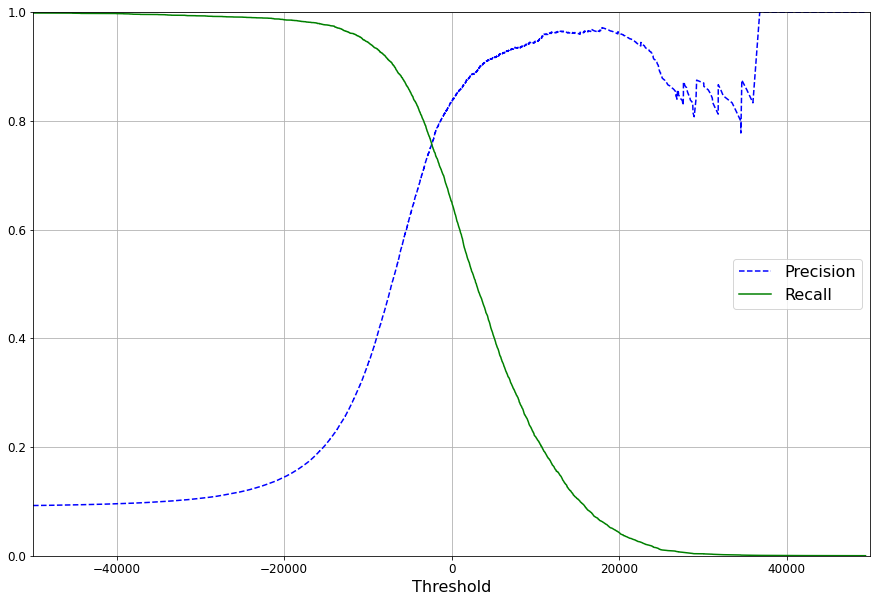

In [56]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [58]:
threshold_90_precision = threshholds[ np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [59]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [62]:
recall_90_precision= recall_score(y_train_5, y_train_pred_90)

Saving figure precision_vs_recall_plot


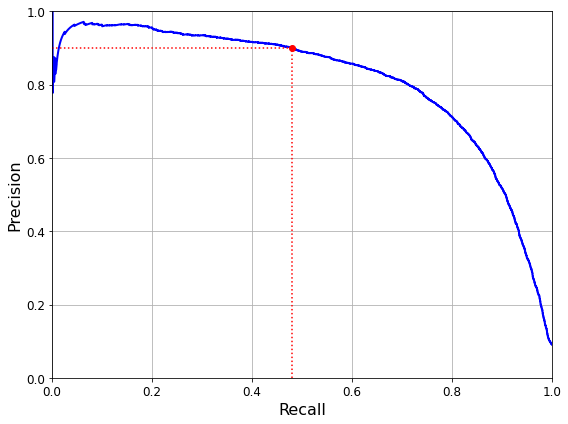

In [63]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

As show in the figure above, the greater is precision the smaller is the recall.  But a high precision do not mean a good model if it gets a low recall. Taking the example above, the binary classifier would not be useful if its requiriments were so high that a slight different hand-writen five was slight different than a "perfect" five.